# Experimental Design for monolayer on DES


Import the necessary packages, models, and code.

In [1]:
%matplotlib inline

import numpy as np

from refnx.reflect import SLD, Slab
from refnx.analysis import Parameter

from hogben.optimise import Optimiser
from hogben.visualise import contrast_choice_single, contrast_choice_double
from hogben.models.monolayers import MonolayerDPPG, MonolayerEllen

# Reduce size of plots for the notebook.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100


Define the 1,2-dipalmitoyl-sn-glycero-3-phospho-(1-rac-glycerol) (DPPG) monolayer model and get the fitted SLD profile (without and with protein) and reflectivity curve for the experimentally-measured (protein-bound) data sets.

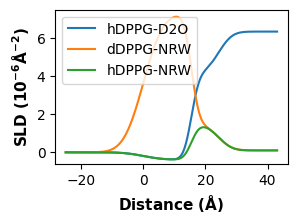

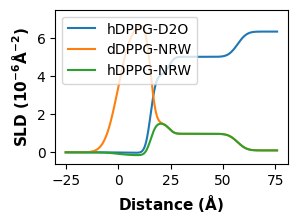

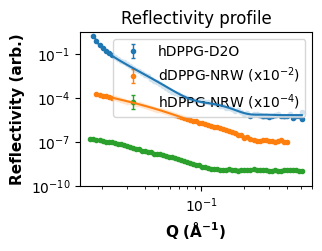

In [2]:
dppg_monolayer = MonolayerDPPG()

save_path = './results'
dppg_monolayer.sld_profile(save_path)
dppg_monolayer.reflectivity_profile(save_path)

In [2]:
# Number of points and times to simulate for each angle.
angle_times = [(0.7, 100, 10), (2.3, 100, 40)] # (Angle, Points, Time)

# Note we will optimize these later, so they are some default values to simulate something with

# Contrast SLDs to consider.
contrast_range = np.linspace(0.45, 6.0, 50)

In [5]:
# Lets optimize stuff!

optimiser = Optimiser(dppg_monolayer)
num_contrasts = 3  # This we define, but if the optimal is less contrasts then we usually see repeated contrasts
angle_splits = [(0.7, 100, 0.2), (2.3, 100, 0.8)]  # What fraction of time to spend at each angle

contrasts, splits, _ = optimiser.optimise_contrasts(num_contrasts, angle_times, workers=-1, verbose=False)

times = np.array(splits) * 100 # Total counting time of 100

print('Contrasts: {}'.format(np.round(contrasts, 2)))
print('Times: {}'.format(np.round(times, 1)))

Contrasts: [0.09 0.09 0.09]
Times: [43.6 41.2 15.2]


In [6]:
optimiser = Optimiser(dppg_monolayer)
num_angles = 4 # Number of angles to optimise.

# Find the optimal angles and times using differential evolution.
angles, splits, _ = optimiser.optimise_angle_times(num_angles, angle_bounds=(0.2, 3.0), verbose=False)

# Calculate the counting times from the splits using total counting time of 100.
times = np.array(splits) * 100

print('Angles: {}'.format(np.round(angles, 2)))
print('Times: {}'.format(np.round(times, 1)))

Angles: [0.25 0.67 2.36 2.37]
Times: [ 4.3 38.3 57.3  0.1]


In [7]:
# Lets optimize stuff!

optimiser = Optimiser(dppg_monolayer)
num_contrasts = 3  # This we define, but if the optimal is less contrasts then we usually see repeated contrasts
angle_splits = [(0.25, 100, 0.04), (0.67, 100, 0.39), (2.37, 100, 0.57)]  # What fraction of time to spend at each angle

contrasts, splits, _ = optimiser.optimise_contrasts(num_contrasts, angle_times, workers=-1, verbose=False)

times = np.array(splits) * 100 # Total counting time of 100

print('Contrasts: {}'.format(np.round(contrasts, 2)))
print('Times: {}'.format(np.round(times, 1)))

Contrasts: [0.08 0.09 1.33]
Times: [ 1.6 98.4  0. ]


In [1]:
from Monolayer_model import MonolayerEllen

NameError: name 'BaseLipid' is not defined

In [7]:
import os

import refnx.dataset
import refnx.reflect
import refnx.analysis

from hogben.models.base import BaseLipid




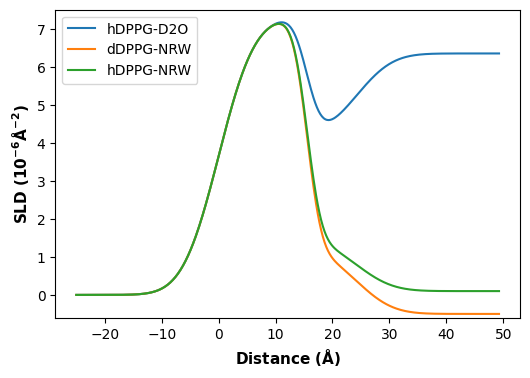

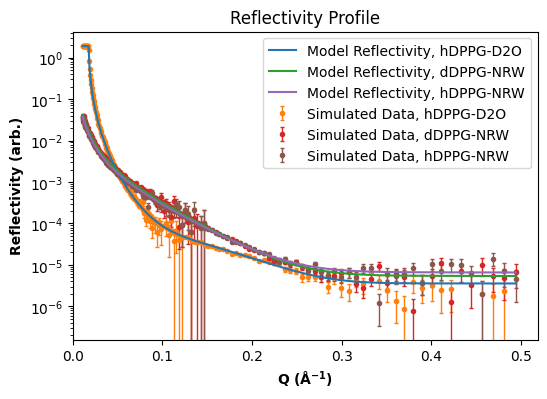

In [3]:
sample = MonolayerEllen()
sample.sld_profile("./")
sample.simulate_reflectivity(angle_times)

In [4]:
# Lets optimize stuff!

optimiser = Optimiser(sample)
num_contrasts = 1  # This we define, but if the optimal is less contrasts then we usually see repeated contrasts
angle_splits = [(0.7, 100, 0.2), (2.3, 100, 0.8)]  # What fraction of time to spend at each angle

contrasts, splits, _ = optimiser.optimise_contrasts(num_contrasts, angle_times, workers=-1, verbose=False)

times = np.array(splits) * 100 # Total counting time of 100

print('Contrasts: {}'.format(np.round(contrasts, 2)))
print('Times: {}'.format(np.round(times, 1)))

Contrasts: [-0.56]
Times: [100.]


In [9]:
help(sample)

Help on MonolayerEllen in module __main__ object:

class MonolayerEllen(hogben.models.base.BaseLipid)
 |  MonolayerEllen(deuterated: bool = False)
 |  
 |  Defines a model describing a monolayer.
 |  
 |  Attributes:
 |      name (str): name of the monolayer sample.
 |      labels (list): label for each measured contrast.
 |      distances (numpy.ndarray): SLD profile x-axis range.
 |      deuterated (bool): whether the tailgroups are deuterated or not.
 |      scales (list): experimental scale factor for each measured contrast.
 |      bkgs (list): level of instrument background noise for each contrast.
 |      dq (float): instrument resolution.
 |      air_tg_rough (refnx.analysis.Parameter): air/tailgroup roughness.
 |      lipid_apm (refnx.analysis.Parameter): lipid area per molecule.
 |      hg_waters (refnx.analysis.Parameter): amount of headgroup bound water.
 |      monolayer_rough (refnx.analysis.Parameter): monolayer roughness.
 |      lipid_vf (refnx.analysis.Parameter): lip